In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
!pip uninstall statsmodels

Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.2


In [ ]:
!pip install scipy
!pip install patsy
!pip install statsmodels
!pip install --upgrade --no-deps statsmodels
import statsmodels.api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
!pip install sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TTM.csv to TTM (1).csv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['TTM.csv']))

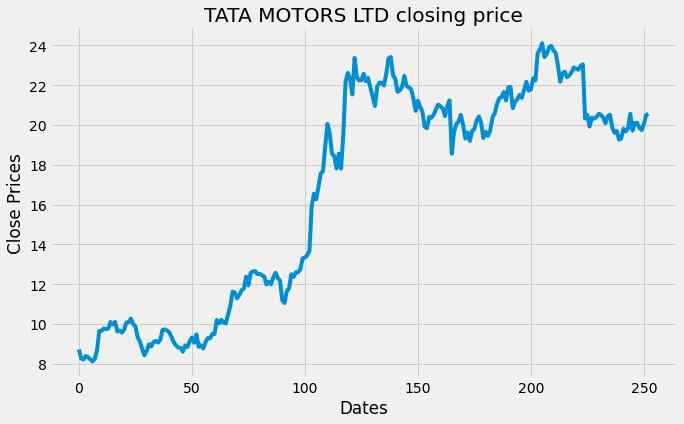

In [ ]:
#plot close price
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('TATA MOTORS LTD closing price')
plt.show()

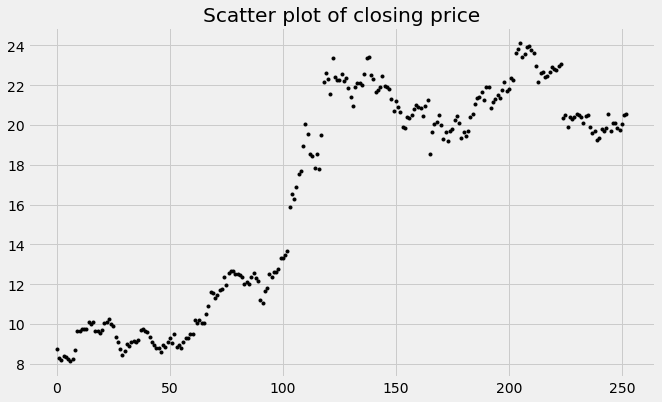

In [ ]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

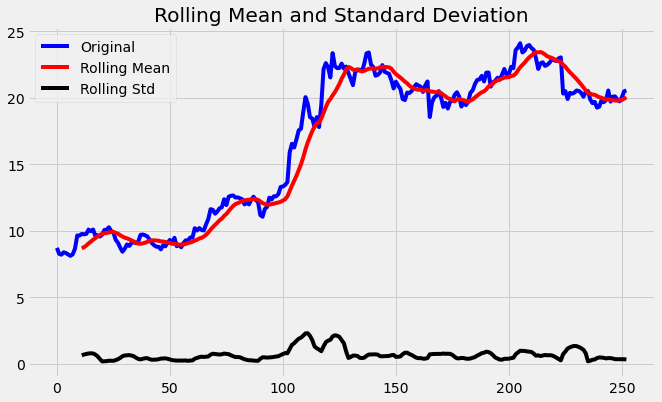

Results of dickey fuller test
Test Statistics                 -1.287094
p-value                          0.635056
No. of lags used                 0.000000
Number of observations used    252.000000
critical value (1%)             -3.456569
critical value (5%)             -2.873079
critical value (10%)            -2.572919
dtype: float64


<Figure size 1152x648 with 0 Axes>

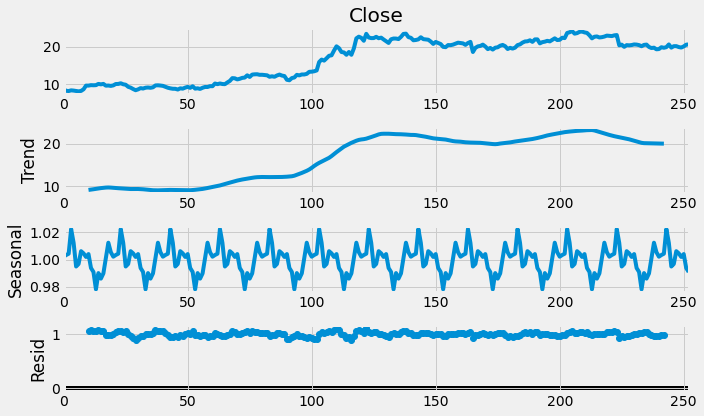

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)
result = seasonal_decompose(df_close, model='multiplicative', period = 20)
fig = plt.figure()
fig1 = result.plot()
fig.set_size_inches(16, 9)


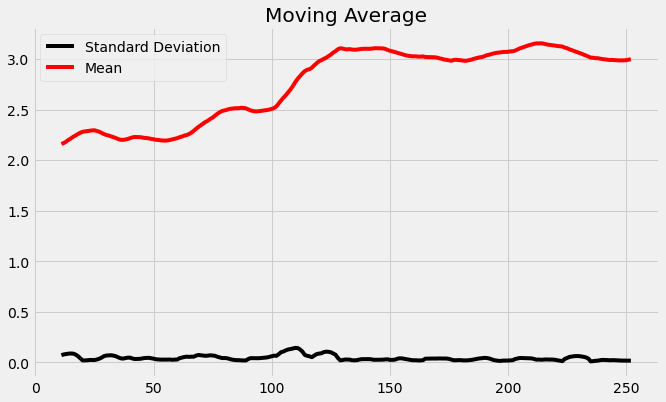

In [ ]:
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-884.891, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-883.182, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-883.154, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-883.829, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-881.345, Time=1.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.926 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  224
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 444.445
Date:                Mon, 08 Aug 2022   AIC                           -884.891
Time:                        08:45:51   BIC                           -878.076
Sample:                             0   HQIC                          -882.140
                                - 224                                       

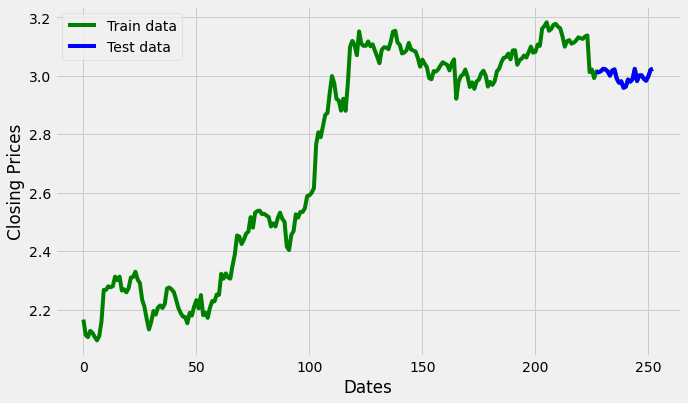

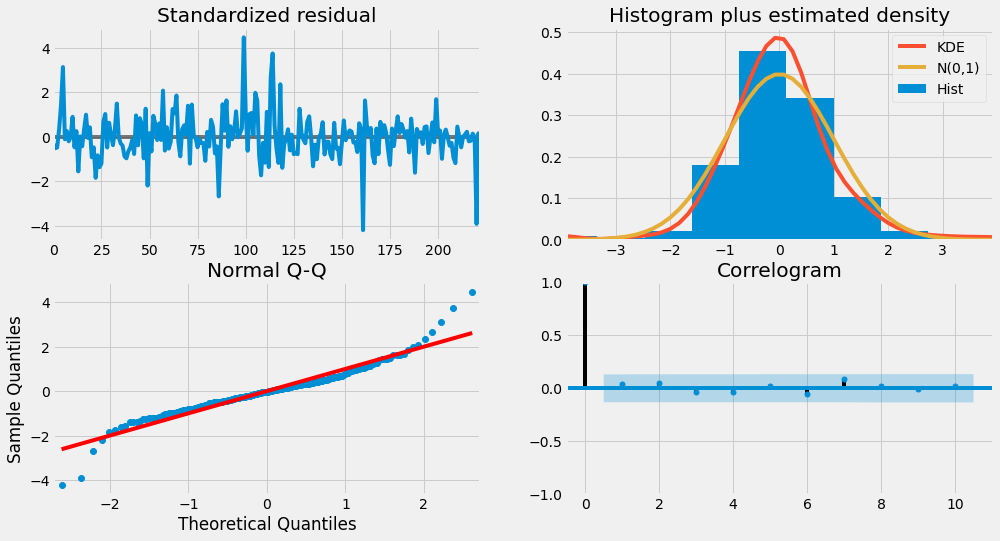

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  224
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 444.863
Date:                Mon, 08 Aug 2022   AIC                           -877.725
Time:                        08:45:55   BIC                           -857.282
Sample:                             0   HQIC                          -869.472
                                - 224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4907      0.196     -7.594      0.000      -1.875      -1.106
ar.L2         -0.6764      0.240     -2.824      0.005      -1.146      -0.207
ar.L3          0.1118      0.071      1.573      0.1

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                             test='adf',       # use adftest to find             optimal 'd'
                             max_p=3, max_q=3, # maximum p and q
                             m=1,              # frequency of series
                             d=None,           # let model determine 'd'
                             seasonal=False,   # No Seasonality
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)
print(model_autoARIMA.summary())

model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

model = statsmodels.tsa.arima.model.ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit()
print(fitted.summary())

In [ ]:
# Prediction
fc, se, conf = fitted.forecast(26, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('TATA MOTORS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: ignored

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

NameError: ignored